In [1]:
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib

def violion_plot(source, title, columns):

    df_combined = [np.array(column) for column in columns]

    # Set up the figure
    fig, ax = plt.subplots(figsize=(9, 6))

    ax.violinplot(df_combined, showextrema=False)

    # Adjust x and y limits
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    # Create a numpy image for the gradient
    Nx, Ny = 1, 1000
    imgArr = np.tile(np.linspace(0, 1, Ny), (Nx, 1)).T
    cmap = 'viridis'  # Customize colormap as needed

    # Modify each violin body with a gradient effect
    violins = ax.collections
    for violin in violins:
        path = Path(violin.get_paths()[0].vertices)
        patch = PathPatch(path, facecolor='none', edgecolor='none')
        ax.add_patch(patch)
        img = ax.imshow(
            imgArr, origin="lower", extent=[xmin, xmax, ymin, ymax], 
            aspect="auto", cmap=cmap, clip_path=patch
        )

    # Add a colorbar
    # ax_divider = make_axes_locatable(ax)
    # cax = ax_divider.append_axes("right", size="5%", pad="2%")
    # norm = matplotlib.colors.Normalize(vmin=ymin, vmax=ymax)
    # cb = matplotlib.colorbar.ColorbarBase(cax, cmap=matplotlib.cm.get_cmap(cmap),
    #                                       norm=norm, orientation='vertical')

    ax.set_xticks([1, 2])  # Set the positions of the x-ticks
    ax.set_xticklabels(['EvoDiff', "MeMDLM"], fontsize=16)

    # Set title and labels
    ax.set_title(title.split(" ")[0] + f" - {source}", fontsize=18)
    ax.set_xlabel('Sequence Source', fontsize=14)
    ax.set_ylabel(source, fontsize=14)

    # Display the plot
    plt.show()

# Example usage:
# Assuming 'l' is your list of DataFrames and 'source' is the column to be visualized.


In [3]:
mlm_upper = pd.read_csv("mlm_uppercase_results.csv")
evo_upper = pd.read_csv("evodiff_uppercase_results.csv")

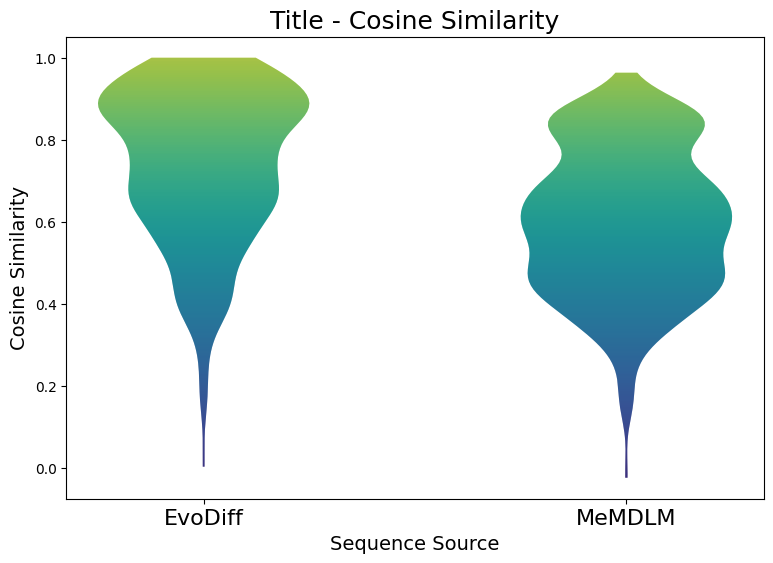

In [7]:
violion_plot("Cosine Similarity", "Title", [evo_upper["Cosine Similarity"], mlm_upper["Cosine Similarity"]])

In [ ]:
mlm_lower = pd.read_csv("mlm_lowercase_results.csv")
evo_lower = pd.read_csv("evodiff_lowercase_results.csv")
violion_plot("Cosine Similarity", "Title", [evo_lower["Cosine Similarity"], mlm_lower["Cosine Similarity"]])